# Training a Convolutional Neural Network to distinguish 88 different category of doodles - v5

### Training on 5000 images from each category and testing on 1000 images from each category

In [0]:
! git clone https://github.com/jp-test-account/dataset.git

Cloning into 'dataset'...
remote: Enumerating objects: 96996, done.
remote: Total 96996 (delta 0), reused 0 (delta 0), pack-reused 96996
Receiving objects: 100% (96996/96996), 206.97 MiB | 30.58 MiB/s, done.
Resolving deltas: 100% (18/18), done.
Checking out files: 100% (96888/96888), done.


In [0]:
! cd dataset && python npy-to-png.py dataset-5000 5000

Pulling 5000 images from boomerang.npy... Done
Pulling 5000 images from vase.npy... Done
Pulling 5000 images from mouse.npy... Done
Pulling 5000 images from cruise_ship.npy... Done
Pulling 5000 images from cactus.npy... Done
Pulling 5000 images from house.npy... Done
Pulling 5000 images from mosquito.npy... Done
Pulling 5000 images from skull.npy... Done
Pulling 5000 images from umbrella.npy... Done
Pulling 5000 images from hand.npy... Done
Pulling 5000 images from kangaroo.npy... Done
Pulling 5000 images from lipstick.npy... Done
Pulling 5000 images from pizza.npy... Done
Pulling 5000 images from compass.npy... Done
Pulling 5000 images from dolphin.npy... Done
Pulling 5000 images from octopus.npy... Done
Pulling 5000 images from wine_glass.npy... Done
Pulling 5000 images from leaf.npy... Done
Pulling 5000 images from pig.npy... Done
Pulling 5000 images from zigzag.npy... Done
Pulling 5000 images from tiger.npy... Done
Pulling 5000 images from strawberry.npy... Done
Pulling 5000 images

In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

from keras.layers import Dense
from keras.layers import Dropout

import numpy as np


# the cnn architecture defined as follows
classifier = Sequential()

# first conv layer
classifier.add(Convolution2D(
        input_shape=(28,28,1),
        filters=16,
        kernel_size=(3,3),
        activation='relu',
        kernel_initializer='uniform'))

# max pooling layer
classifier.add(MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2)))

# second conv layer
classifier.add(Convolution2D(
        filters=16,
        kernel_size=(3,3),
        activation='relu',
        kernel_initializer='uniform'))

# max pooling layer
classifier.add(MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2)))

# flattening for feeding the data to a fully connected artificial neural network
classifier.add(Flatten())

# first hidden layer
classifier.add(Dense(units=128, activation='relu', kernel_initializer='uniform'))
classifier.add(Dropout(rate=0.4))

# output layer
classifier.add(Dense(units=88, activation='softmax', kernel_initializer='uniform'))

# compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# well... after rescaling (dividing by 255), if pixel value is less than 0.2 then consider it a black pixel,
# otherwise a white one
def preprocessing(img):
    img = img/255
    return np.where(img < 0.2, 0, 1)

# image preprocessing before feeding into the CNN
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(preprocessing_function=preprocessing)

# training data set
train_set = data_generator.flow_from_directory(
        'dataset/dataset-5000/',
        batch_size=32,
        target_size=(28,28), color_mode='grayscale')

# testing/validation data set
test_set = data_generator.flow_from_directory(
        'dataset/dataset-1000/',
        batch_size=4,
        target_size=(28,28), color_mode='grayscale')


Found 440000 images belonging to 88 classes.
Found 87999 images belonging to 88 classes.


### Epoch 1 - 10

In [0]:
# finally fitting the data and training the CNN
history = classifier.fit_generator(
        epochs=10,
        initial_epoch=0,
        generator=train_set,
        steps_per_epoch=13750,
        validation_data=test_set,
        validation_steps=22250,
        use_multiprocessing=True)

Epoch 1/10
13750/13750 [==============================] - 189s 14ms/step - loss: 2.4253 - acc: 0.3925 - val_loss: 1.6557 - val_acc: 0.5852
Epoch 2/10
13750/13750 [==============================] - 186s 14ms/step - loss: 1.9858 - acc: 0.4946 - val_loss: 1.5130 - val_acc: 0.6185
Epoch 3/10
13750/13750 [==============================] - 185s 13ms/step - loss: 1.8944 - acc: 0.5164 - val_loss: 1.4620 - val_acc: 0.6325
Epoch 4/10
13750/13750 [==============================] - 184s 13ms/step - loss: 1.8476 - acc: 0.5280 - val_loss: 1.4373 - val_acc: 0.6333
Epoch 5/10
13750/13750 [==============================] - 184s 13ms/step - loss: 1.8125 - acc: 0.5367 - val_loss: 1.4144 - val_acc: 0.6409
Epoch 6/10
13750/13750 [==============================] - 184s 13ms/step - loss: 1.7945 - acc: 0.5412 - val_loss: 1.3979 - val_acc: 0.6468
Epoch 7/10
13750/13750 [==============================] - 184s 13ms/step - loss: 1.7818 - acc: 0.5440 - val_loss: 1.4143 - val_acc: 0.6443
Epoch 8/10
13750/13750 [===

In [0]:
classifier.save('model-v5-28-6530.h5')

In [0]:
! ls -l --block-size=MB

total 1MB
drwxr-xr-x 7 root root 1MB Jun 13 05:36 dataset
drwx------ 3 root root 1MB Jun 13 08:15 drive
-rw-r--r-- 1 root root 1MB Jun 13 09:53 model-v5-28-6530.h5
drwxr-xr-x 1 root root 1MB May 31 16:17 sample_data


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! cp model-v5-28-6530.h5 drive/My\ Drive

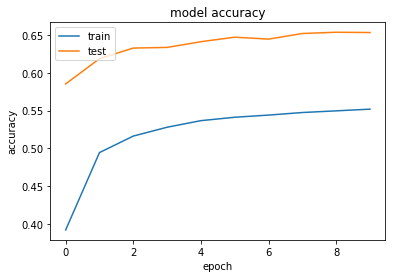

In [0]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

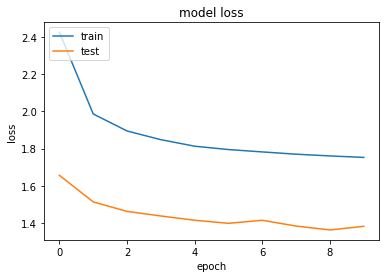

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Epoch 10 - 20

In [0]:
history = classifier.fit_generator(
        epochs=20,
        initial_epoch=10,
        generator=train_set,
        steps_per_epoch=13750,
        validation_data=test_set,
        validation_steps=22250,
        use_multiprocessing=True)

Epoch 11/20
13750/13750 [==============================] - 191s 14ms/step - loss: 1.7478 - acc: 0.5533 - val_loss: 1.3647 - val_acc: 0.6521
Epoch 12/20
13750/13750 [==============================] - 191s 14ms/step - loss: 1.7420 - acc: 0.5539 - val_loss: 1.3440 - val_acc: 0.6577
Epoch 13/20
13750/13750 [==============================] - 190s 14ms/step - loss: 1.7383 - acc: 0.5552 - val_loss: 1.3433 - val_acc: 0.6583
Epoch 14/20
13750/13750 [==============================] - 191s 14ms/step - loss: 1.7366 - acc: 0.5560 - val_loss: 1.3492 - val_acc: 0.6574
Epoch 15/20
13750/13750 [==============================] - 191s 14ms/step - loss: 1.7349 - acc: 0.5553 - val_loss: 1.3544 - val_acc: 0.6547
Epoch 16/20
13750/13750 [==============================] - 190s 14ms/step - loss: 1.7329 - acc: 0.5569 - val_loss: 1.3471 - val_acc: 0.6574
Epoch 17/20
13750/13750 [==============================] - 191s 14ms/step - loss: 1.7311 - acc: 0.5581 - val_loss: 1.3804 - val_acc: 0.6514
Epoch 18/20
13750/13

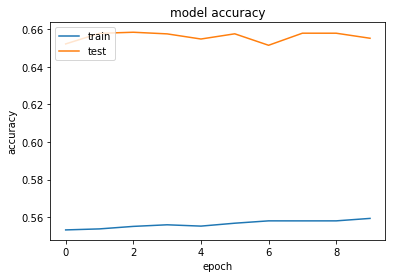

In [0]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

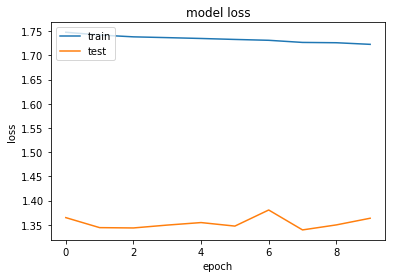

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Training entire model for 15 epochs with threshold = 0.3

In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

from keras.layers import Dense
from keras.layers import Dropout

import numpy as np


# the cnn architecture defined as follows
classifier = Sequential()

# first conv layer
classifier.add(Convolution2D(
        input_shape=(28,28,1),
        filters=16,
        kernel_size=(3,3),
        activation='relu',
        kernel_initializer='uniform'))

# max pooling layer
classifier.add(MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2)))

# second conv layer
classifier.add(Convolution2D(
        filters=16,
        kernel_size=(3,3),
        activation='relu',
        kernel_initializer='uniform'))

# max pooling layer
classifier.add(MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2)))

# flattening for feeding the data to a fully connected artificial neural network
classifier.add(Flatten())

# first hidden layer
classifier.add(Dense(units=128, activation='relu', kernel_initializer='uniform'))
classifier.add(Dropout(rate=0.4))

# output layer
classifier.add(Dense(units=88, activation='softmax', kernel_initializer='uniform'))

# compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# well... after rescaling (dividing by 255), if pixel value is less than 0.3 then consider it a black pixel,
# otherwise a white one
def preprocessing(img):
    img = img/255
    return np.where(img < 0.3, 0, 1)

# image preprocessing before feeding into the CNN
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(preprocessing_function=preprocessing)

# training data set
train_set = data_generator.flow_from_directory(
        'dataset/dataset-5000/',
        batch_size=32,
        target_size=(28,28), color_mode='grayscale')

# testing/validation data set
test_set = data_generator.flow_from_directory(
        'dataset/dataset-1000/',
        batch_size=4,
        target_size=(28,28), color_mode='grayscale')


Found 440000 images belonging to 88 classes.
Found 87999 images belonging to 88 classes.


### Epoch 1 - 15

In [0]:
# finally fitting the data and training the CNN
history = classifier.fit_generator(
        epochs=15,
        initial_epoch=0,
        generator=train_set,
        steps_per_epoch=13750,
        validation_data=test_set,
        validation_steps=22250,
        use_multiprocessing=True)

Epoch 1/15
13750/13750 [==============================] - 191s 14ms/step - loss: 2.4472 - acc: 0.3874 - val_loss: 1.6713 - val_acc: 0.5850
Epoch 2/15
13750/13750 [==============================] - 189s 14ms/step - loss: 2.0274 - acc: 0.4852 - val_loss: 1.5336 - val_acc: 0.6144
Epoch 3/15
13750/13750 [==============================] - 188s 14ms/step - loss: 1.9318 - acc: 0.5083 - val_loss: 1.4821 - val_acc: 0.6290
Epoch 4/15
13750/13750 [==============================] - 189s 14ms/step - loss: 1.8802 - acc: 0.5213 - val_loss: 1.4643 - val_acc: 0.6337
Epoch 5/15
13750/13750 [==============================] - 189s 14ms/step - loss: 1.8275 - acc: 0.5345 - val_loss: 1.4099 - val_acc: 0.6430
Epoch 6/15
13750/13750 [==============================] - 190s 14ms/step - loss: 1.8044 - acc: 0.5413 - val_loss: 1.4099 - val_acc: 0.6450
Epoch 7/15
13750/13750 [==============================] - 190s 14ms/step - loss: 1.7802 - acc: 0.5458 - val_loss: 1.3943 - val_acc: 0.6514
Epoch 8/15
13750/13750 [===

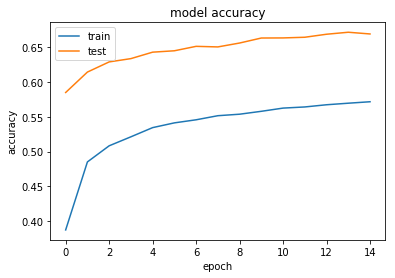

In [0]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

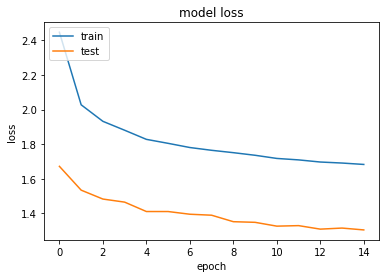

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
classifier.save('model-v5-28-6692.h5')

In [0]:
! ls -l --block-size=MB

total 2MB
drwxr-xr-x 7 root root 1MB Jun 13 05:36 dataset
drwx------ 3 root root 1MB Jun 13 08:15 drive
-rw-r--r-- 1 root root 1MB Jun 13 09:53 model-v5-28-6530.h5
-rw-r--r-- 1 root root 1MB Jun 13 11:24 model-v5-28-6692.h5
drwxr-xr-x 1 root root 1MB May 31 16:17 sample_data


In [0]:
! cp model-v5-28-6530.h5 drive/My\ Drive

### Epoch 15 - 25

In [0]:
history = classifier.fit_generator(
        epochs=25,
        initial_epoch=15,
        generator=train_set,
        steps_per_epoch=13750,
        validation_data=test_set,
        validation_steps=22250,
        use_multiprocessing=True)

Epoch 16/25
13750/13750 [==============================] - 189s 14ms/step - loss: 1.6826 - acc: 0.5715 - val_loss: 1.2954 - val_acc: 0.6724
Epoch 17/25
13750/13750 [==============================] - 189s 14ms/step - loss: 1.6800 - acc: 0.5720 - val_loss: 1.3026 - val_acc: 0.6695
Epoch 18/25
13750/13750 [==============================] - 189s 14ms/step - loss: 1.6749 - acc: 0.5731 - val_loss: 1.2951 - val_acc: 0.6700
Epoch 19/25
13750/13750 [==============================] - 189s 14ms/step - loss: 1.6732 - acc: 0.5731 - val_loss: 1.2989 - val_acc: 0.6728
Epoch 20/25
13750/13750 [==============================] - 189s 14ms/step - loss: 1.6686 - acc: 0.5746 - val_loss: 1.2801 - val_acc: 0.6752
Epoch 21/25
13750/13750 [==============================] - 189s 14ms/step - loss: 1.6702 - acc: 0.5744 - val_loss: 1.2905 - val_acc: 0.6727
Epoch 22/25
13750/13750 [==============================] - 189s 14ms/step - loss: 1.6699 - acc: 0.5755 - val_loss: 1.2937 - val_acc: 0.6750
Epoch 23/25
13750/13

In [0]:
classifier.save('model-v5-28-6759.h5')
! cp model-v5-28-6759.h5 drive/My\ Drive

### Epoch 25 - 50

In [35]:
history = classifier.fit_generator(
        epochs=50,
        initial_epoch=25,
        generator=train_set,
        steps_per_epoch=13750,
        validation_data=test_set,
        validation_steps=22250,
        use_multiprocessing=True)

Epoch 26/50
13750/13750 [==============================] - 190s 14ms/step - loss: 1.6615 - acc: 0.5763 - val_loss: 1.2868 - val_acc: 0.6758
Epoch 27/50
13750/13750 [==============================] - 190s 14ms/step - loss: 1.6617 - acc: 0.5763 - val_loss: 1.2832 - val_acc: 0.6759
Epoch 28/50
13750/13750 [==============================] - 191s 14ms/step - loss: 1.6601 - acc: 0.5761 - val_loss: 1.2952 - val_acc: 0.6735
Epoch 29/50
13750/13750 [==============================] - 191s 14ms/step - loss: 1.6601 - acc: 0.5768 - val_loss: 1.2829 - val_acc: 0.6749
Epoch 30/50
13750/13750 [==============================] - 193s 14ms/step - loss: 1.6606 - acc: 0.5764 - val_loss: 1.2875 - val_acc: 0.6741
Epoch 31/50
13750/13750 [==============================] - 193s 14ms/step - loss: 1.6583 - acc: 0.5779 - val_loss: 1.2823 - val_acc: 0.6763
Epoch 32/50
13750/13750 [==============================] - 192s 14ms/step - loss: 1.6577 - acc: 0.5774 - val_loss: 1.2943 - val_acc: 0.6757
Epoch 33/50
13750/13

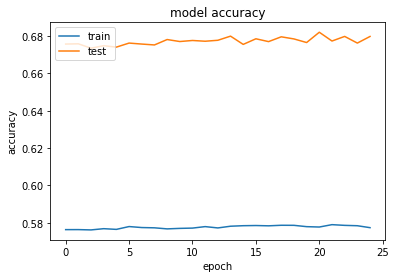

In [36]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Epoch 50 - 60

In [37]:
history = classifier.fit_generator(
        epochs=60,
        initial_epoch=50,
        generator=train_set,
        steps_per_epoch=13750,
        validation_data=test_set,
        validation_steps=22250,
        use_multiprocessing=True)

Epoch 51/60
13750/13750 [==============================] - 193s 14ms/step - loss: 1.6499 - acc: 0.5786 - val_loss: 1.2674 - val_acc: 0.6804
Epoch 52/60
13750/13750 [==============================] - 194s 14ms/step - loss: 1.6519 - acc: 0.5786 - val_loss: 1.2796 - val_acc: 0.6742
Epoch 53/60
13750/13750 [==============================] - 195s 14ms/step - loss: 1.6508 - acc: 0.5774 - val_loss: 1.2648 - val_acc: 0.6806
Epoch 54/60
13750/13750 [==============================] - 194s 14ms/step - loss: 1.6505 - acc: 0.5794 - val_loss: 1.2809 - val_acc: 0.6762
Epoch 55/60
13750/13750 [==============================] - 196s 14ms/step - loss: 1.6493 - acc: 0.5789 - val_loss: 1.2663 - val_acc: 0.6800
Epoch 56/60
13750/13750 [==============================] - 193s 14ms/step - loss: 1.6481 - acc: 0.5796 - val_loss: 1.2638 - val_acc: 0.6822
Epoch 57/60
13750/13750 [==============================] - 192s 14ms/step - loss: 1.6471 - acc: 0.5790 - val_loss: 1.2824 - val_acc: 0.6797
Epoch 58/60
13750/13

## The model is kind of stuck at this accuracy, no more improvement is possible - well classifying 59,699 unique doodles out of 88,000 is not that bad, is it?